In [1]:
import fastbook
import fastcore
import torch
import pandas as pd

from fastbook import *
from fastai.tabular.all import *
from fastai.text.all import *
from sklearn.model_selection import train_test_split

from utils.all import *

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

curPath = getCurDir()
dataPath = getDatasetPath(curPath)

# dataPath.ls()

In [2]:
all_ham_files = get_text_files(dataPath, folders = ['ham'])
all_spam_files = get_text_files(dataPath, folders = ['spam'])

len(all_ham_files), len(all_spam_files)

(3672, 1500)

In [3]:
df_hams = createEmailDataset(all_ham_files, 0)
df_spams = createEmailDataset(all_spam_files, 1)

In [4]:
df_hams.head()

,Content,Label
0,Subject christmas tree farm pictures,0
1,Subject vastar resources inc gary production from the high island larger block a 1 2 commenced on saturday at 2 00 p m at about 6 500 gross carlos expects between 9 500 and 10 000 gross for tomorrow vastar owns 68 of the gross production george x 3 6992 forwarded by george weissman hou ect on 12 13 99 10 16 am daren j farmer 12 10 99 10 38 am to carlos j rodriguez hou ect ect cc george weissman hou ect ect melissa graves hou ect ect subject vastar resources inc carlos please call linda and get everything set up i m going to estimate 4 500 coming up tomorrow with a 2 000 increase each follo...,0
2,Subject calpine daily gas nomination calpine daily gas nomination 1 doc,0
3,Subject re issue fyi see note below already done stella forwarded by stella l morris hou ect on 12 14 99 10 18 am from sherlyn schumack on 12 14 99 10 06 am to stella l morris hou ect ect cc howard b camp hou ect ect subject re issue stella this has already been taken care of you did this for me yesterday thanks howard b camp 12 14 99 09 10 am to stella l morris hou ect ect cc sherlyn schumack hou ect ect howard b camp hou ect ect stacey neuweiler hou ect ect daren j farmer hou ect ect subject issue stella can you work with stacey or daren to resolve hc forwarded by howard b camp hou ect o...,0
4,Subject meter 7268 nov allocation fyi forwarded by lauri a allen hou ect on 12 14 99 12 17 pm kimberly vaughn 12 10 99 02 54 pm to lauri a allen hou ect ect cc mary m smith hou ect ect subject meter 7268 nov allocation lauri i have put this on strangas gas until i can get a contract from daren forwarded by kimberly vaughn hou ect on 12 10 99 01 52 pm lauri a allen 12 09 99 01 20 pm to kimberly vaughn hou ect ect anita luong hou ect ect cc howard b camp hou ect ect mary m smith hou ect ect subject meter 7268 nov allocation kim anita a volume of 7247 mm shows to have been allocated to the re...,0


In [5]:
df_spams.head()

,Content,Label
0,Subject dobmeos with hgh my energy level has gone up stukm introducing doctor formulated hgh human growth hormone also called hgh is referred to in medical science as the master hormone it is very plentiful when we are young but near the age of twenty one our bodies begin to produce less of it by the time we are forty nearly everyone is deficient in hgh and at eighty our production has normally diminished at least 90 95 advantages of hgh increased muscle strength loss in body fat increased bone density lower blood pressure quickens wound healing reduces cellulite improved vision wrinkle di...,1
1,Subject your prescription is ready oxwq s f e low cost prescription medications soma ultram adipex vicodin many more prescribed online and shipped overnight to your door one of our us licensed physicians will write an fda approved prescription for you and ship your order overnight via a us licensed pharmacy direct to your doorstep fast and secure click here no thanks please take me off your list ogrg z lqlokeolnq lnu,1
2,Subject get that new car 8434 people nowthe weather or climate in any particular environment can change and affect what people eat and how much of it they are able to eat,1
3,Subject await your response dear partner we are a team of government officials that belong to an eight man committee in the presidential cabinet as well as the senate at the moment we will be requiring your assistance in a matter that involves investment of monies which we intend to transfer to your account upon clarification and a workable agreement reached in consummating the project with you based on a recommendation from an associate concerning your integrity loyalty and understanding we deemed it necessary to contact you accordingly all arrangements in relation to this investment init...,1
4,Subject coca cola mbna america nascar partner with otcbb imts stock profile about company investment highlights press release 12 01 2003 indianapolis in race car simulators inks the sale of eight simulators for installation in moscow 09 17 2003 indianapolis in nascar silicon motor speedway simulators go international 09 05 2003 indianapolis in nascar silicon motor speedway expands to monterey california s famed cannery row 09 02 2003 indianapolis in nascar silicon motor speedway announces custom upgrades to world s most realistic racing simulation 08 14 2003 indianapolis in race car simula...,1


In [6]:
df_all = shuffleDataset(
    pd.concat([df_hams, df_spams], axis = 0)
) 
df_all.head(10)

,Content,Label
0,Subject hpl nom for august 18 2000 see attached file hplo 818 xls hplo 818 xls,0
1,Subject enron nom for november 7 2000 see attached file hplnl 107 xls hplnl 107 xls,0
2,Subject enron hpl actuals for july 19 2000 teco tap 20 000 enron 100 000 iferc ls hpl lsk ic 30 000 enron,0
3,Subject hpl nom for may 25 2001 see attached file hplno 525 xls hplno 525 xls,0
4,Subject rates daren rates for september t ville interconnects to equistar channelview 15 agua dulce interconnects to equistar channelview 13 let me know if you get something done or need quotes on something else term rate on 6461 to follow,0
5,Subject kleberg plant outages in september cornhusker i spoke with michael mazowita white pine energy as he said the expected outages are as follows august 31 st september lst 12 hours 12 00 pm to 12 00 am no flow september 25 th 31 st all days no flow,0
6,Subject hpl nom for july 1 2000 see attached file hplo 701 xls hplo 701 xls,0
7,Subject re wed 21 jan 2004 08 15 42 0500 email loading image not loading view message here dis c o n t i n u e kwm wxjki ymylcs opng qjbrj gtpq dcpbnz yxax cpcsgr phksav gqryhw wxovj sjl nbhf agah tjlup nnkk ghgds ydgbq lyulev voeiiu wjwib pjgk eno gxt tgkob eiqn elnav fkcmwi mwcsv ypei hskpiz mmjohc tei pcc fwje akgfs pjg duaoj qfbwnt pxzw kbrklx fwhpex bykmh rky fmvcn xzvoj oco jfqjz jjhqly leiz lmw ltz bpzrb wttxn iuvtv hbi dvvbg uhfyw pxs qoj sscn xnwayd tah ieince rdqf erdwl maezxf cltc ukyda hxw nbjrsm fsc ydf dhqwll xltzo xkqm zeil nfyve ajgjac nvu oto sajfqi ywhn hjfklp vrvreq ghhx...,1
8,Subject calpine daily gas nomination julie the texas city plant will have a unit down until late friday night or early saturday morning i will send the weekend nomination this afternoon ricky a archer fuel supply 700 louisiana suite 2700 houston texas 77002 713 830 8659 direct 713 830 8722 fax calpine daily gas nomination 1 doc,0
9,Subject unify close schedule the following is our tentative close schedule for this coming month please keep in the mind the following key times unify to sitara bridge back 1 45 p m friday march 31 st all errors must be clear by this time mass draft at 6 p m friday evening accrual process begins monday april 3 rd at 6 a m if you have any changes to this timeline please ensure that i am contacted as soon as possible thank you melissa x 35615,0


In [7]:
df_train, df_test = train_test_split(
    df_all, 
    stratify = df_all['Label'], 
    test_size = 0.1,
    random_state = 999
)

df_train.shape, df_test.shape

((4654, 2), (518, 2))

In [8]:
dls = TextDataLoaders.from_df(df_train)
dls.show_batch(max_n=3)

,text,category
0,xxbos xxmaj subject fw red white and blue out original message from carter rhonda mailto xxunk xxunk org sent friday september 14 2001 12 33 pm to al abbott compuserve com xxunk sprintmail com xxunk hotmail com xxunk flash net xxunk xxunk com xxunk yahoo com bob xxunk com xxunk 998 hotmail com janie beth prodigy net xxunk mccarthy com xxunk flash net locke xxunk gte net xxunk 7 11 com erika publish no irs gov ali xxunk net xxunk ticnet com xxunk aol com xxunk 30 aol com allan xxunk com chuck anderson oxy com xxunk 96 aol com brian xxunk bigfoot com xxunk xxunk com xxunk archer xxunk xxunk nortelnetworks com xxunk airmail net xxunk yahoo com xxunk xxunk com xxunk aggie xxunk com ag 85 home com xxunk home com xxunk cyber designs com xxunk netscape net bob xxunk com xxunk xxunk com xxunk aol com xxunk,0
1,xxbos xxmaj subject the expatriate zone issue 1 2 14 00 the expatriate zone 1 15 00 issue 1 where every day is just another xxunk day in paradise the zine for the xxunk impaired in this issue featured expatriate of the month james sunny jim white travel into the zone and beat the irs at the same time jimmydotcom where s that parrot head book we ve been hearing about club trini update millennium change bubba style see what all the xxunk online was about xxunk 1 xxrep 3 9 bad boys of the expatriated xxunk club xxunk south of the border xxunk pilots association new club in the making for the web page edition go to it includes some great pictures we suggest printing it out and laying it out on your coffee table that way you have somewhere to set your red stripe so you don t,0
2,xxbos xxmaj subject online xxunk 80 off all meds xxunk xxunk xxunk xxunk xxunk 80 off all meds xxunk today at your doorstep tomorrow xxunk xxunk meridia xxunk xxunk viagra xxunk st xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk xxunk soma xxunk xxunk zyban xxunk xxunk xxrep 3 e xxunk prozac xxunk xxunk xxunk xxunk all the long lines place your xxunk xxunk now xxunk xxunk eagle relaxation leaden madras meson mitosis quadrant congratulatory salaam transferred flatulent statesmen credential biota horoscope banister tampon edit superb biochemic legacy polemic cavern euridyce yea broomcorn kinesic acquisitive invidious bridegroom stipulate earthquake twit brendan edmund togs heretofore pop abhorred emotional debacle mesmeric amorous swamp quirt confront huntley cochrane calculable godparent embargoes thelma thought dent massey buzzing burdock case degradation explore startle humble lieutenant fletcher durrell beman fund novelty crania pluperfect prick furnace alone ambulate hayward redhead stumpage instant steppe gecko triple,1


# Training

In [9]:
cleanCache()

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


In [10]:
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.3, 
    metrics = Perplexity()
)

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.0020892962347716093)

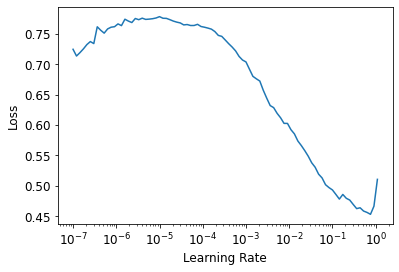

In [11]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(5, slice(8e-2, 1e-1))

epoch,train_loss,valid_loss,perplexity,time
0,0.186689,0.296613,1.345294,00:20
1,0.273810,0.435068,1.545068,00:20
2,0.233473,0.129866,1.138675,00:20
3,0.189994,0.122047,1.129807,00:20
4,0.155889,0.121263,1.128922,00:20


In [14]:
learn.save_encoder('model00')
del learn
cleanCache()

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  0
Current GPU memory by caching:  165675008


# Fine Tune

In [15]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.5, 
    metrics = accuracy
)

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.009120108559727669)

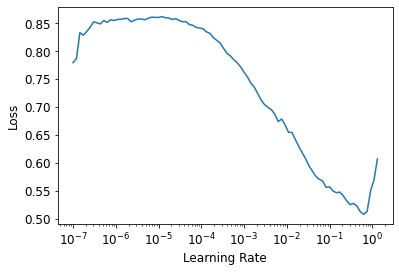

In [16]:
learn = learn.load_encoder('model00')
learn.lr_find()

In [17]:
cleanCache()
learn.fit_one_cycle(1, 9e-2)

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  166751744
Current GPU memory by caching:  188743680


epoch,train_loss,valid_loss,accuracy,time
0,0.330372,0.221682,0.900000,00:20


In [18]:
cleanCache()
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-2/(2.6**4),5e-2))

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  152591360
Current GPU memory by caching:  167772160


epoch,train_loss,valid_loss,accuracy,time
0,0.260815,0.185556,0.927957,00:23


In [19]:
learn.save_encoder('model01')
del learn
cleanCache()

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  0
Current GPU memory by caching:  312475648


Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  0
Current GPU memory by caching:  0


SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.0006918309954926372)

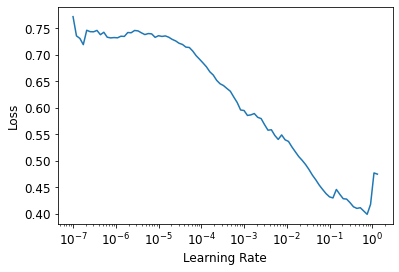

In [20]:
cleanCache()
learn = text_classifier_learner(
    dls, 
    AWD_LSTM, 
    drop_mult = 0.5, 
    metrics = accuracy
)
learn = learn.load_encoder('model01')
learn.lr_find()

In [21]:
cleanCache()

learn.fit_one_cycle(5, slice(6e-1/(2.6**4),1))

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  204530176
Current GPU memory by caching:  243269632


epoch,train_loss,valid_loss,accuracy,time
0,2.128318,2.791067,0.908602,00:20
1,12.089890,97.661018,0.754839,00:20
2,5.169147,165.055145,0.908602,00:20
3,2.024259,415.798431,0.949462,00:20
4,1.112141,2759.989746,0.950538,00:20


In [22]:
learn.save_encoder('model_final')
cleanCache()

Cuda available:  True
Device:  GeForce GTX 1060 with Max-Q Design
Current GPU memory by tensors:  152591360
Current GPU memory by caching:  165675008


# Testing

In [24]:
for i in range(10):
    randIndex = np.random.randint(len(df_test) - 1)
    testEmail = df_test.iloc[randIndex]['Content'];
    testLabel = df_test.iloc[randIndex]['Label'];

    resPredict = learn.predict(testEmail)
    print('Expect: ', testLabel)
    print('Predict: ', resPredict)
    print('------------------\n')

Expect:  0
Predict:  ('0', tensor(0), tensor([1.0000e+00, 7.8643e-16]))
------------------



Expect:  0
Predict:  ('1', tensor(1), tensor([1.7101e-05, 9.9998e-01]))
------------------



Expect:  1
Predict:  ('1', tensor(1), tensor([3.0817e-14, 1.0000e+00]))
------------------



Expect:  1
Predict:  ('1', tensor(1), tensor([1.1543e-20, 1.0000e+00]))
------------------



Expect:  0
Predict:  ('0', tensor(0), tensor([1.0000e+00, 2.5093e-41]))
------------------



Expect:  1
Predict:  ('1', tensor(1), tensor([3.0490e-09, 1.0000e+00]))
------------------



Expect:  1
Predict:  ('1', tensor(1), tensor([1.1543e-20, 1.0000e+00]))
------------------



Expect:  0
Predict:  ('1', tensor(1), tensor([2.2038e-21, 1.0000e+00]))
------------------



Expect:  1
Predict:  ('1', tensor(1), tensor([9.9263e-05, 9.9990e-01]))
------------------



Expect:  0
Predict:  ('0', tensor(0), tensor([1.0000e+00, 1.1937e-36]))
------------------



# The End